<a href="https://colab.research.google.com/github/frh02/CAN_Research/blob/main/LSTM_CAN_Multiclass_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries 

In [1]:
import pandas as pd
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import keras.utils
from keras import utils as np_utils
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md
from keras.utils.np_utils import to_categorical
import csv
%matplotlib inline  
from ast import literal_eval 
import array as array
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping


## Reading the file for multi class classification

In [2]:
df = pd.read_csv('/content/Multi_class_Attack.csv')
print(df)

       Unnamed: 0  Unnamed: 0.1        Time       seconds   ID Value  App  \
0               0             0  Timestamp:  0.000000e+00  ID:   790    0   
1               1             1  Timestamp:  2.240000e-04  ID:   809    0   
2               2             2  Timestamp:  4.620000e-04  ID:   128    0   
3               3             3  Timestamp:  7.040000e-04  ID:   129    0   
4               4             4  Timestamp:  8.780000e-04  ID:   288    0   
...           ...           ...         ...           ...  ...   ...  ...   
35995        7995          7995  Timestamp:  1.481193e+09  ID:  0220    0   
35996        7996          7996  Timestamp:  1.481193e+09  ID:  0316    0   
35997        7997          7997  Timestamp:  1.481193e+09  ID:  018f    0   
35998        7998          7998  Timestamp:  1.481193e+09  ID:  0080    0   
35999        7999          7999  Timestamp:  1.481193e+09  ID:  0081    0   

        DLC  N  D1  D2  D3  D4  D5  D6  D7  D8  Target  
0      DLC:  8  05

## Shuffling the data and cleaning the data 


In [3]:
df = df.reindex(np.random.permutation(df.index))
properties = list(df.columns.values)
properties.remove('Time')
properties.remove('seconds')
properties.remove('ID')
properties.remove('DLC')
properties.remove('App')
properties.remove('Unnamed: 0')
properties.remove('Unnamed: 0.1')
properties.remove('Target')
df['Value']= df['Value'].apply(lambda x: int(str(x),16))
df['D1']=df['D1'].apply(lambda x: int(str(x),16))
df['D2']=df['D2'].apply(lambda x: int(str(x),16))
df['D3']=df['D3'].apply(lambda x: int(str(x),16))
df['D4']=df['D4'].apply(lambda x: int(str(x),16))
df['D5']=df['D5'].apply(lambda x: int(str(x),16))
df['D6']=df['D6'].apply(lambda x: int(str(x),16))
df['D7']=df['D7'].apply(lambda x: int(str(x),16))
df['D8']=df['D8'].apply(lambda x: int(str(x),16))
X = df[properties]
X = np.asarray(X).astype(np.float32)
y = df['Target']
X = np.expand_dims(X, axis=2)
y = np.expand_dims(y, axis=1)
print(X.shape)
print(y.shape)

(36000, 10, 1)
(36000, 1)


## One hot encoding for labels

In [4]:
y = to_categorical(y, num_classes=4)

## Converting the 2D array to the 3D array for LSTM analysis 

In [5]:
TIME_STEPS = 288
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])
    # Convert 2D sequences into 3D as we will be feeding this into
    # a convolutional layer.
    return np.expand_dims(output, axis=2)

training_value = df 
x_train = create_sequences(training_value)
print("Training input shape: ", x_train.shape)
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, random_state=42)

Training input shape:  (35712, 288, 1, 18)


In [6]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

((27000, 10, 1), (27000, 4), (9000, 10, 1), (9000, 4))


## Loading the LSTM Model

In [7]:
epochs = 50
#emb_dim = 128
batch_size = 128
y[:2]
n_steps = X_train.shape[1]
n_features = X_train.shape[2]

In [8]:
model = Sequential()

model.add(LSTM(256, activation='relu',
               input_shape=(n_steps, n_features), return_sequences=True))
#model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


124/169 [=====================>........] - ETA: 1s - loss: 1.8272 - accuracy: 0.5629

KeyboardInterrupt: ignored

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Testing Accuracy")
plt.legend()
plt.show()

## Using a simple deep learning model for classification data 

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(10,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
	  keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.softmax),
])

In [10]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )

history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)
test_loss, test_acc = model.evaluate(X_test, y_test)

169/169 [==============================] - 3s 9ms/step - loss: 2.5602 - accuracy: 0.5530 - val_loss: 1.0936 - val_accuracy: 0.5154
Epoch 2/100
169/169 [==============================] - 1s 7ms/step - loss: 0.6889 - accuracy: 0.7265 - val_loss: 0.5619 - val_accuracy: 0.7870
Epoch 3/100
169/169 [==============================] - 1s 6ms/step - loss: 0.5963 - accuracy: 0.7612 - val_loss: 0.6259 - val_accuracy: 0.6859
Epoch 4/100
169/169 [==============================] - 1s 4ms/step - loss: 0.5745 - accuracy: 0.7665 - val_loss: 0.4596 - val_accuracy: 0.8341
Epoch 5/100
169/169 [==============================] - 1s 4ms/step - loss: 0.4951 - accuracy: 0.7931 - val_loss: 0.4330 - val_accuracy: 0.8081
Epoch 6/100
169/169 [==============================] - 1s 4ms/step - loss: 0.5020 - accuracy: 0.7917 - val_loss: 0.4697 - val_accuracy: 0.7681
Epoch 7/100
169/169 [==============================] - 1s 4ms/step - loss: 0.4464 - accuracy: 0.8100 - val_loss: 0.3956 - val_accuracy: 0.8387
Epoch 8/100

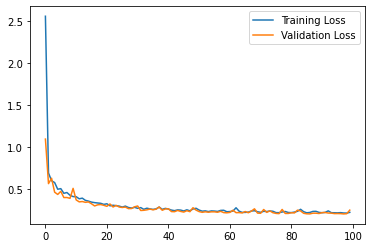

In [11]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

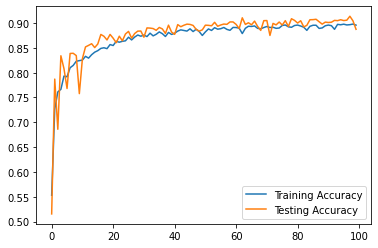

In [12]:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Testing Accuracy")
plt.legend()
plt.show()

In [16]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(10,)),
	  keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.softmax),
])

In [17]:
model_2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )

history_1 = model_2.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)
test_loss, test_acc = model_2.evaluate(X_test, y_test)

Epoch 1/100
169/169 [==============================] - 1s 4ms/step - loss: 7.9615 - accuracy: 0.5083 - val_loss: 1.9951 - val_accuracy: 0.4839
Epoch 2/100
169/169 [==============================] - 1s 3ms/step - loss: 1.4200 - accuracy: 0.6543 - val_loss: 0.9852 - val_accuracy: 0.6843
Epoch 3/100
169/169 [==============================] - 1s 3ms/step - loss: 0.9020 - accuracy: 0.6985 - val_loss: 1.0709 - val_accuracy: 0.5722
Epoch 4/100
169/169 [==============================] - 1s 4ms/step - loss: 0.9872 - accuracy: 0.7061 - val_loss: 0.6175 - val_accuracy: 0.7559
Epoch 5/100
169/169 [==============================] - 1s 3ms/step - loss: 0.9217 - accuracy: 0.7234 - val_loss: 1.1756 - val_accuracy: 0.6174
Epoch 6/100
169/169 [==============================] - 1s 3ms/step - loss: 0.8532 - accuracy: 0.7323 - val_loss: 0.6425 - val_accuracy: 0.6948
Epoch 7/100
169/169 [==============================] - 1s 4ms/step - loss: 0.8851 - accuracy: 0.7323 - val_loss: 0.6723 - val_accuracy: 0.7737

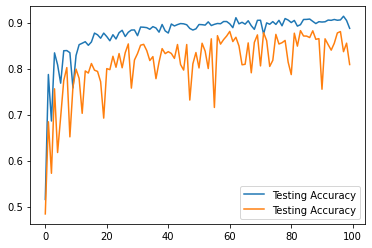

In [18]:
#set up plotting area
plt.figure(0).clf()
plt.plot(history.history["val_accuracy"],label="Testing Accuracy")
plt.plot(history_1.history["val_accuracy"],label="Testing Accuracy")


#add legend
plt.legend()

In [19]:
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt


In [20]:
#create fake dataset
X, y = datasets.make_classification(n_samples=1000,
                                    n_features=4,
                                    n_informative=3,
                                    n_redundant=1,
                                    random_state=0)

#split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

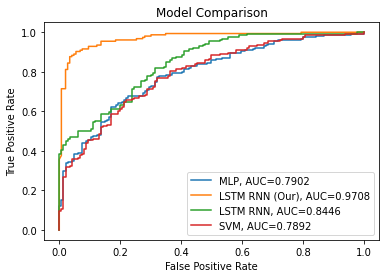

In [44]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="MLP, AUC="+str(auc))
plt.title('Model Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LSTM RNN (Our), AUC="+str(auc))

# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)
# y_pred = model.predict_proba(X_test)[:, 1]
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
# plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))

# model = KNeighborsClassifier()
# model.fit(X_train, y_train)
# y_pred = model.predict_proba(X_test)[:, 1]
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
# plt.plot(fpr,tpr,label="KNeighbors Classifier, AUC="+str(auc))

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LSTM RNN, AUC="+str(auc))

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))
#add legend
plt.legend()
plt.savefig('acc_comp.png', dpi = 500)